# Exploratory Data Analysis (EDA)

This notebook contains common imports for exploratory data analysis and loads the coffee sales data for analysis.

## 1. Import Data Manipulation Libraries

In [13]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

## 2. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('raw_data/index_1.csv')

## 3. Display Basic Dataset Information

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Data types and missing values
print("Data types and missing values:")
df.info()

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [5]:
# Summary statistics
print("Summary statistics:")
display(df.describe())

Summary statistics:


,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [6]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [26]:
df['cash_type'].unique()

array(['card', 'cash'], dtype=object)

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

## 4. Clean Data

In [8]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("\n")

# Fill NaN values in 'card' column with the most common value
df['card'] = df['card'].fillna(df['card'].mode()[0])

# Remove any rows with missing values in critical columns if any
df_cleaned = df.dropna()

# Remove duplicate rows if any
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.describe()

Missing values per column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


Number of duplicate rows: 0




,datetime,money
count,3636,3636.000000
mean,2024-10-01 02:35:30.535053568,31.746859
min,2024-03-01 10:15:50.520000,18.120000
25%,2024-07-03 16:54:06.084750080,27.920000
50%,2024-10-07 02:55:12.649500160,32.820000
75%,2025-01-08 07:55:20.299750144,35.760000
max,2025-03-23 18:11:38.635000,40.000000
std,NaN,4.919926


## 5. Exploratory Data Analysis

Text(0.5, 0, 'Coffee Name')

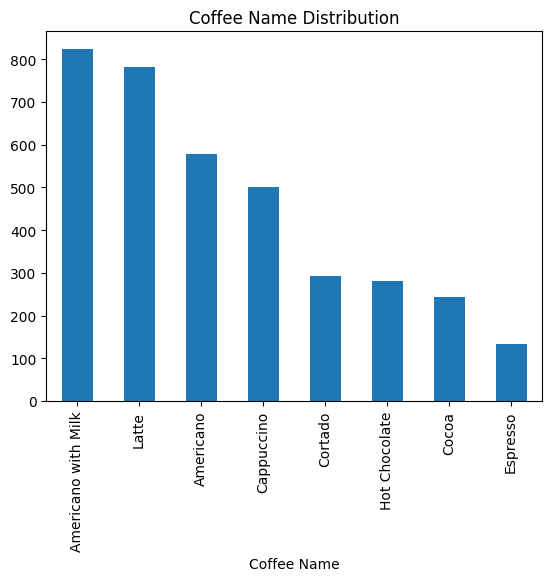

In [9]:
df['coffee_name'].value_counts().plot(kind='bar', title='Coffee Name Distribution')
plt.xlabel('Coffee Name')

In [10]:
# Extract week number and day of week from datetime
df_cleaned['week'] = df_cleaned['datetime'].dt.isocalendar().week
df_cleaned['day_of_week'] = df_cleaned['datetime'].dt.day_name()
df_cleaned['date'] = df_cleaned['datetime'].dt.date

### Number of Sales Visuals

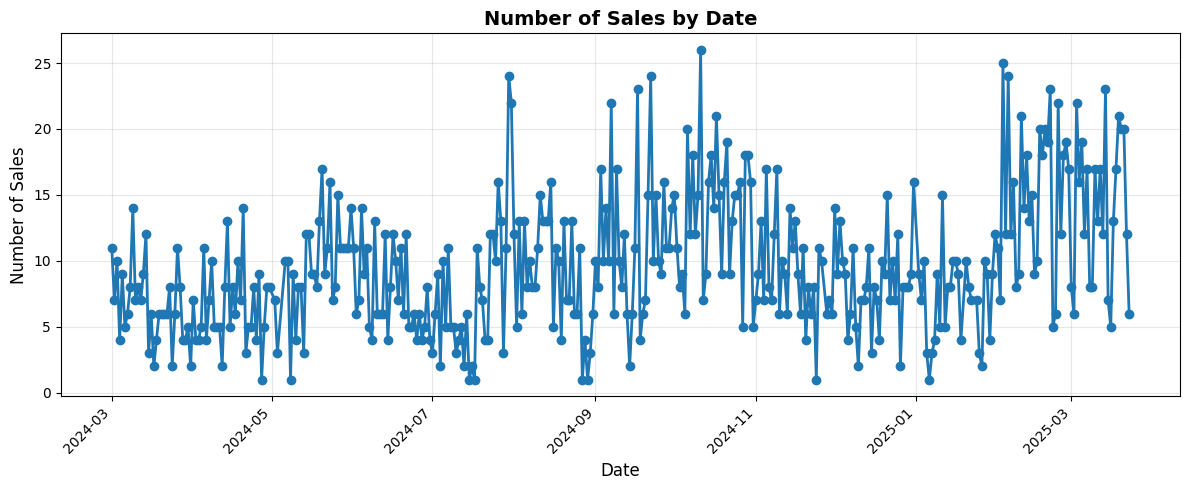

In [19]:
# Chart 1: Number of sales by date
daily_sales_by_date = df_cleaned.groupby('date').size().reset_index(name='num_sales')

plt.figure(figsize=(12, 5))
plt.plot(daily_sales_by_date['date'], daily_sales_by_date['num_sales'], marker='o', linewidth=2, markersize=6)
plt.title('Number of Sales by Date', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


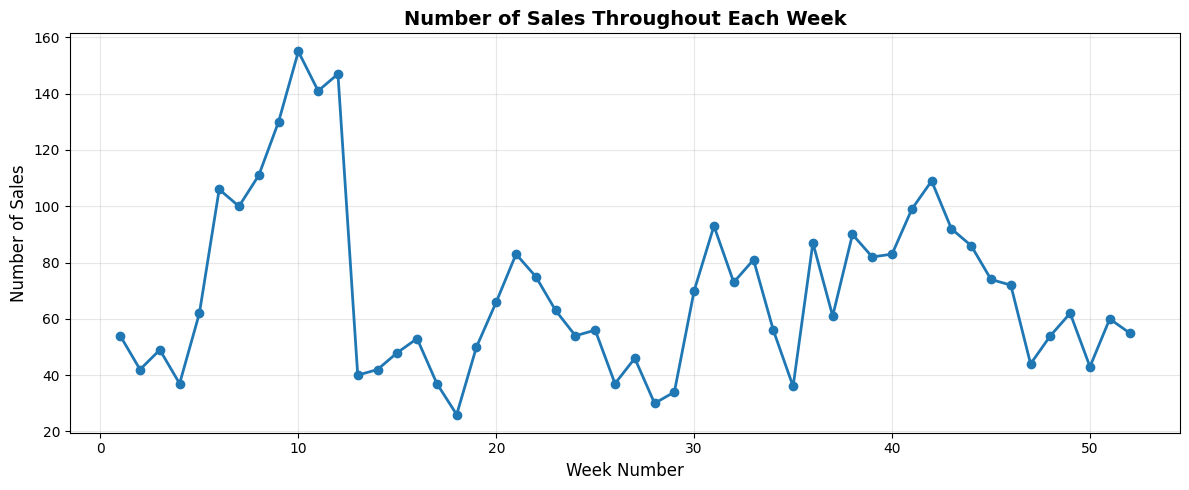

In [ ]:
# Chart 2: Number of sales throughout each week for better readability
weekly_sales = df_cleaned.groupby('week').size().reset_index(name='num_sales')

plt.figure(figsize=(12, 5))
plt.plot(weekly_sales['week'], weekly_sales['num_sales'], marker='o', linewidth=2, markersize=6)
plt.title('Number of Sales Throughout Each Week', fontsize=14, fontweight='bold')
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
    

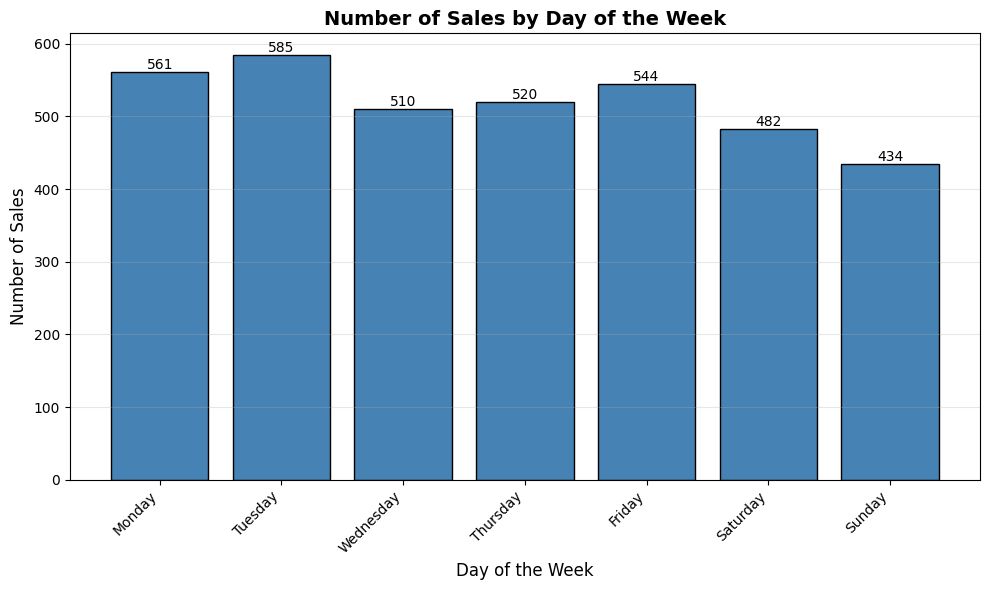

In [12]:
# Chart 2: Number of sales on each day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df_cleaned.groupby('day_of_week').size().reindex(day_order).reset_index(name='num_sales')

plt.figure(figsize=(10, 6))
bars = plt.bar(daily_sales['day_of_week'], daily_sales['num_sales'], color='steelblue', edgecolor='black')
plt.title('Number of Sales by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

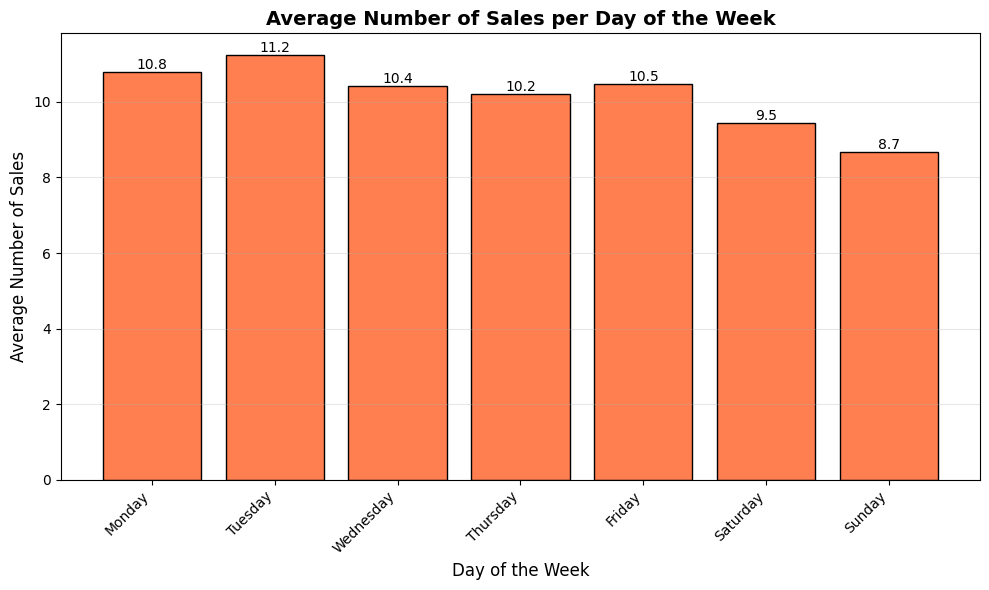

In [23]:
# Chart 4: Average number of sales per day of the week
# Calculate average sales per day of the week across all weeks
avg_sales_by_day = df_cleaned.groupby('day_of_week').size() / df_cleaned.groupby('day_of_week')['week'].nunique()
avg_sales_by_day = avg_sales_by_day.reindex(day_order).reset_index(name='avg_sales')

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_sales_by_day['day_of_week'], avg_sales_by_day['avg_sales'], color='coral', edgecolor='black')
plt.title('Average Number of Sales per Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

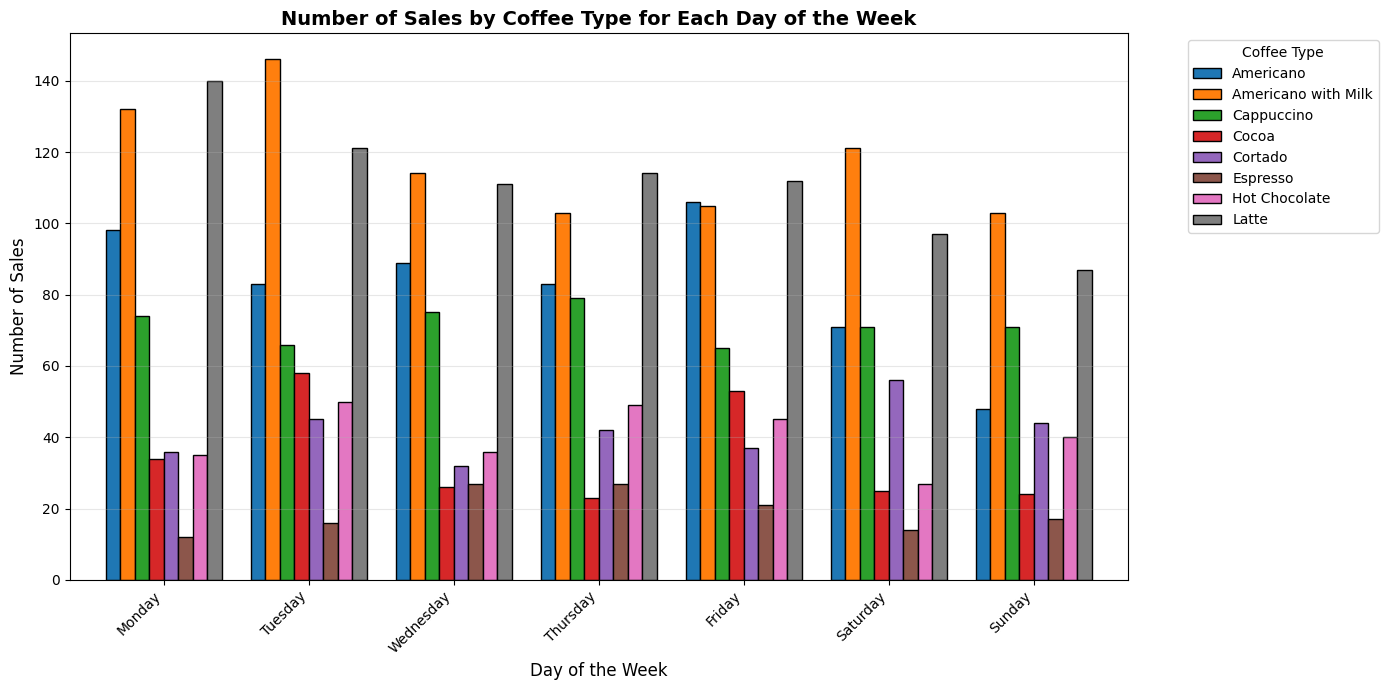


Sales by Coffee Type and Day of the Week:


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,98,132,74,34,36,12,35,140
Tuesday,83,146,66,58,45,16,50,121
Wednesday,89,114,75,26,32,27,36,111
Thursday,83,103,79,23,42,27,49,114
Friday,106,105,65,53,37,21,45,112
Saturday,71,121,71,25,56,14,27,97
Sunday,48,103,71,24,44,17,40,87


In [14]:
# Chart 3: Number of sales by coffee type for each day of the week
sales_by_type_day = df_cleaned.groupby(['day_of_week', 'coffee_name']).size().reset_index(name='num_sales')

# Pivot the data for better visualization
sales_pivot = sales_by_type_day.pivot(index='day_of_week', columns='coffee_name', values='num_sales')
sales_pivot = sales_pivot.reindex(day_order)

# Create a grouped bar chart
plt.figure(figsize=(14, 7))
sales_pivot.plot(kind='bar', figsize=(14, 7), edgecolor='black', width=0.8)
plt.title('Number of Sales by Coffee Type for Each Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data table as well
print("\nSales by Coffee Type and Day of the Week:")
display(sales_pivot)

### Amount of Money gained visuals

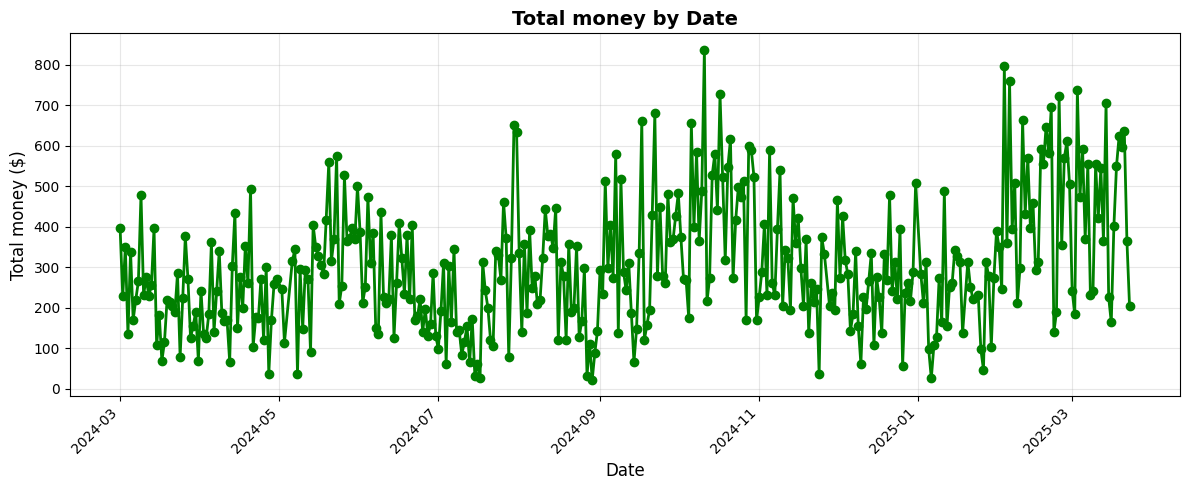

In [ ]:
# Chart 5: Total money by date
total_money_by_date = df_cleaned.groupby('date')['money'].sum().reset_index(name='total_money')

plt.figure(figsize=(12, 5))
plt.plot(total_money_by_date['date'], total_money_by_date['total_money'], marker='o', linewidth=2, markersize=6, color='green')
plt.title('Total money by Date', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total money ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

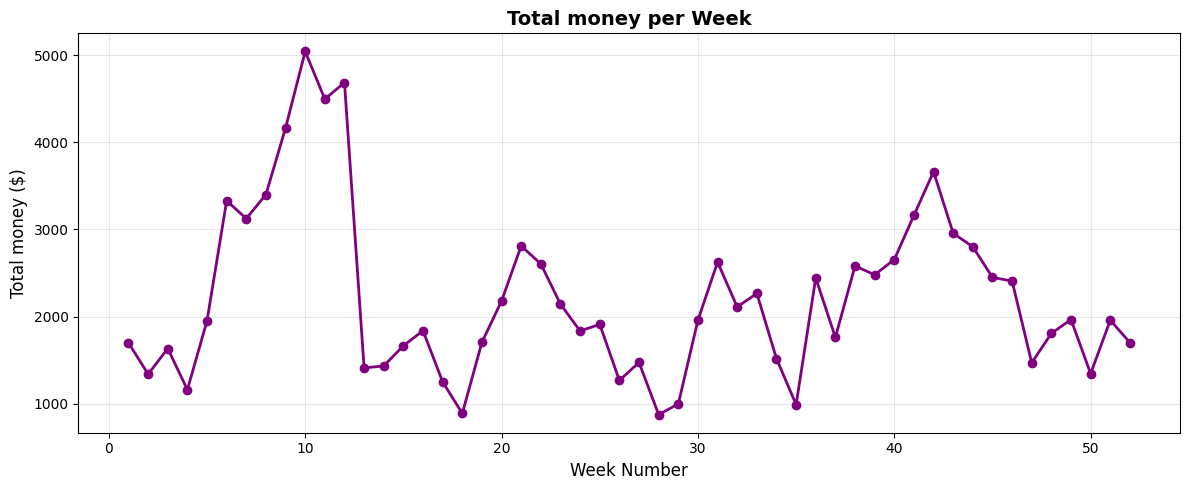

In [ ]:
# Chart 6: Total money per week
total_money_by_week = df_cleaned.groupby('week')['money'].sum().reset_index(name='total_money')

plt.figure(figsize=(12, 5))
plt.plot(total_money_by_week['week'], total_money_by_week['total_money'], marker='o', linewidth=2, markersize=6, color='purple')
plt.title('Total money per Week', fontsize=14, fontweight='bold')
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Total money ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

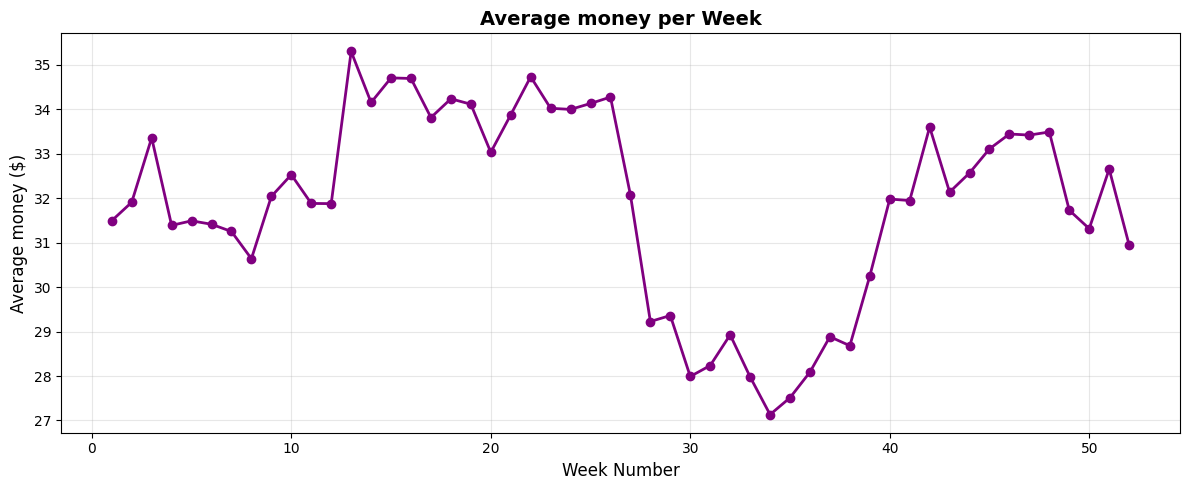

In [ ]:
# Chart 7: Average money per week
avg_money_by_week = df_cleaned.groupby('week')['money'].mean().reset_index(name='avg_money')

plt.figure(figsize=(12, 5))
plt.plot(avg_money_by_week['week'], avg_money_by_week['avg_money'], marker='o', linewidth=2, markersize=6, color='purple')
plt.title('Average money per Week', fontsize=14, fontweight='bold')
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Average money ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

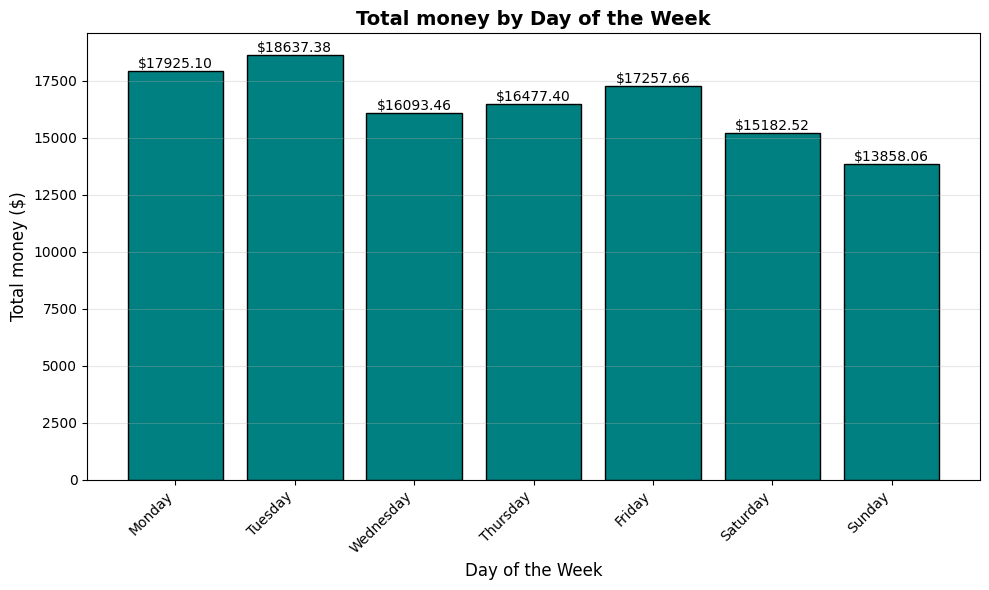

In [ ]:
# Chart 8: Total money by day of the week
total_money_by_day_of_week = df_cleaned.groupby('day_of_week')['money'].sum().reindex(day_order).reset_index(name='total_money')

plt.figure(figsize=(10, 6))
bars = plt.bar(total_money_by_day_of_week['day_of_week'], total_money_by_day_of_week['total_money'], color='teal', edgecolor='black')
plt.title('Total money by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total money ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

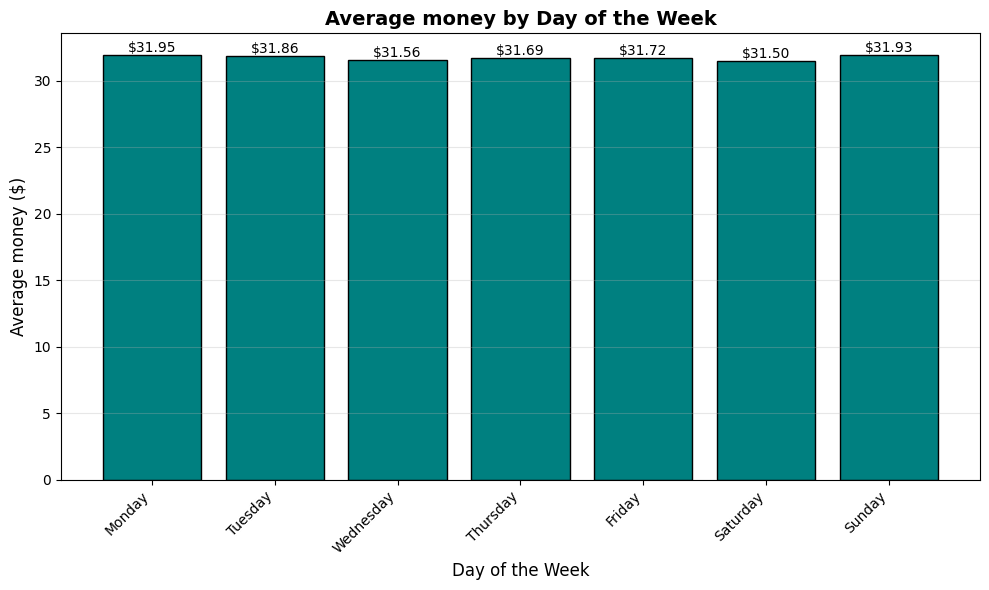

In [ ]:
# Chart 9: Average money by day of the week
avg_money_by_day_of_week = df_cleaned.groupby('day_of_week')['money'].mean().reindex(day_order).reset_index(name='avg_money')

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_money_by_day_of_week['day_of_week'], avg_money_by_day_of_week['avg_money'], color='teal', edgecolor='black')
plt.title('Average money by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average money ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

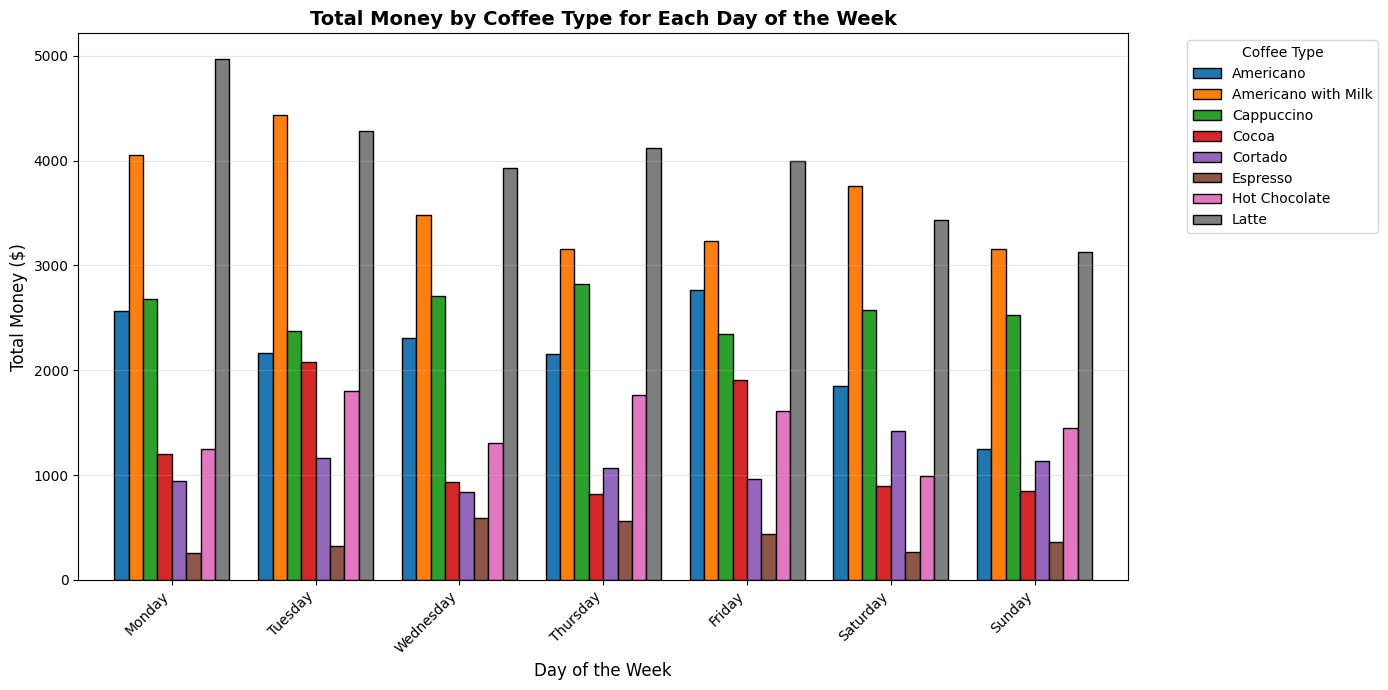


Total Money by Coffee Type and Day of the Week:


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,2568.12,4053.78,2676.58,1205.06,948.40,259.62,1246.70,4966.84
Tuesday,2168.62,4436.60,2375.80,2074.38,1162.44,327.16,1805.96,4286.42
Wednesday,2309.56,3479.06,2711.72,929.76,834.76,587.28,1307.28,3934.04
Thursday,2153.82,3156.04,2827.62,819.54,1069.74,563.72,1766.26,4120.66
Friday,2766.58,3230.90,2343.00,1905.40,966.40,440.30,1612.14,3992.94
Saturday,1847.28,3754.86,2571.92,894.60,1418.48,270.34,989.02,3436.02
Sunday,1248.28,3157.88,2527.50,849.42,1134.64,365.86,1445.10,3129.38


In [ ]:
# Total money by coffee type for each day of the week
total_money_by_type_day = df_cleaned.groupby(['day_of_week', 'coffee_name'])['money'].sum().reset_index(name='total_money')

# Pivot the data for better visualization
total_money_pivot = total_money_by_type_day.pivot(index='day_of_week', columns='coffee_name', values='total_money')
total_money_pivot = total_money_pivot.reindex(day_order)

# Create a grouped bar chart
plt.figure(figsize=(14, 7))
total_money_pivot.plot(kind='bar', figsize=(14, 7), edgecolor='black', width=0.8)
plt.title('Total money by Coffee Type for Each Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total money ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data table as well
print("\nTotal money by Coffee Type and Day of the Week:")
display(total_money_pivot)

<Figure size 1400x700 with 0 Axes>

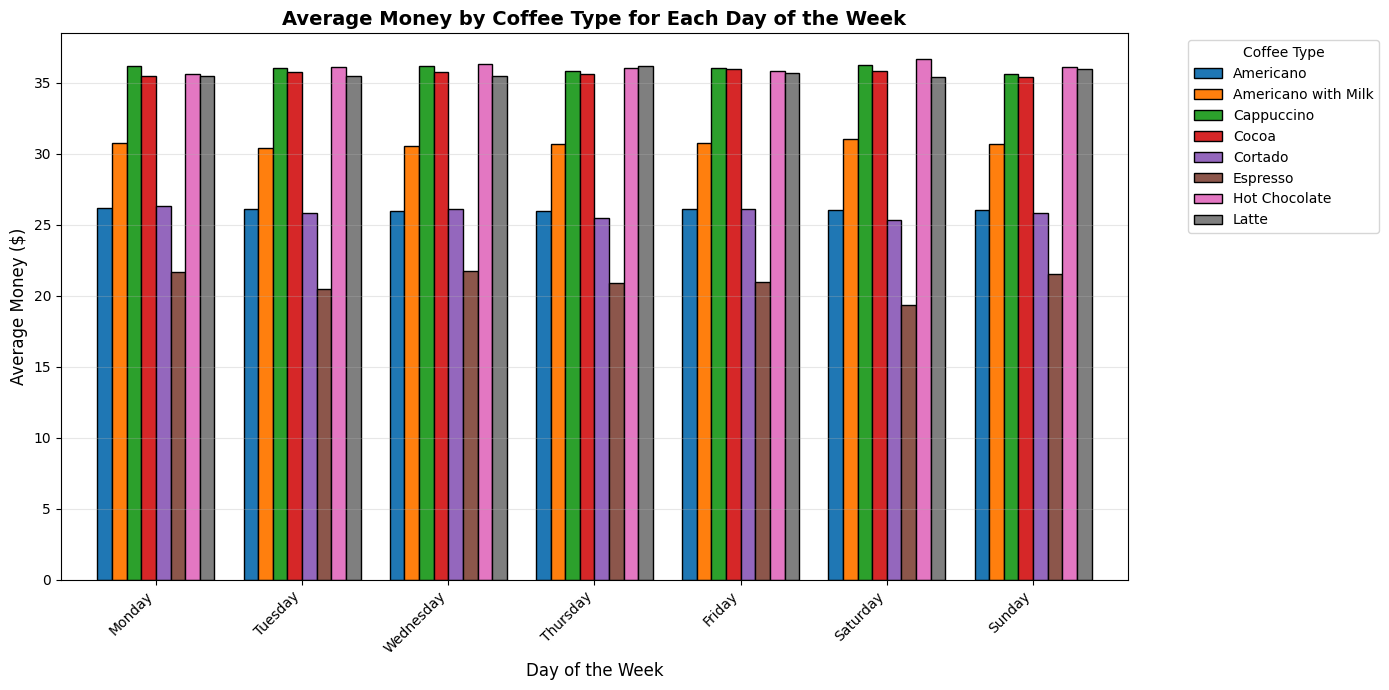


Average Money by Coffee Type and Day of the Week:


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,26.205306,30.710455,36.170000,35.442941,26.344444,21.635000,35.620000,35.477429
Tuesday,26.127952,30.387671,35.996970,35.765172,25.832000,20.447500,36.119200,35.424959
Wednesday,25.950112,30.518070,36.156267,35.760000,26.086250,21.751111,36.313333,35.441802
Thursday,25.949639,30.641165,35.792658,35.632174,25.470000,20.878519,36.046122,36.146140
Friday,26.099811,30.770476,36.046154,35.950943,26.118919,20.966667,35.825333,35.651250
Saturday,26.018028,31.031901,36.224225,35.784000,25.330000,19.310000,36.630370,35.422887
Sunday,26.005833,30.659029,35.598592,35.392500,25.787273,21.521176,36.127500,35.969885


In [ ]:
# Average money by coffee type for each day of the week
avg_money_by_type_day = df_cleaned.groupby(['day_of_week', 'coffee_name'])['money'].mean().reset_index(name='avg_money')

# Pivot the data for better visualization
avg_money_pivot = avg_money_by_type_day.pivot(index='day_of_week', columns='coffee_name', values='avg_money')
avg_money_pivot = avg_money_pivot.reindex(day_order)

# Create a grouped bar chart
plt.figure(figsize=(14, 7))
avg_money_pivot.plot(kind='bar', figsize=(14, 7), edgecolor='black', width=0.8)
plt.title('Average money by Coffee Type for Each Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average money ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data table as well
print("\nAverage money by Coffee Type and Day of the Week:")
display(avg_money_pivot)

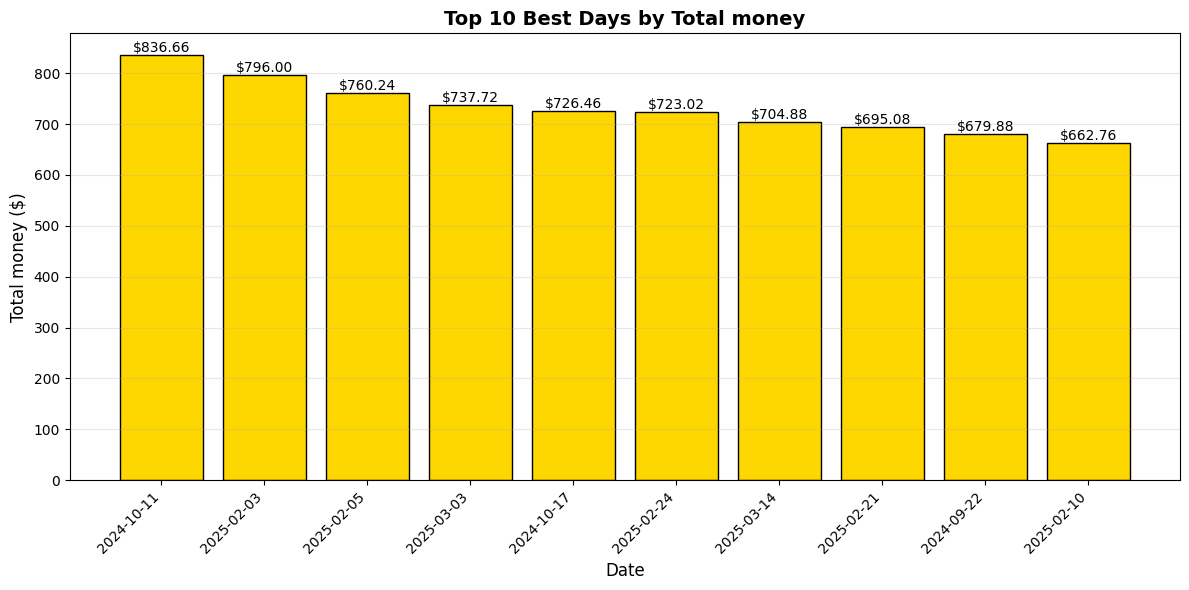


Top 10 Best Days by Total money:


,date,total_money
0,2024-10-11,836.66
1,2025-02-03,796.00
2,2025-02-05,760.24
3,2025-03-03,737.72
4,2024-10-17,726.46
5,2025-02-24,723.02
6,2025-03-14,704.88
7,2025-02-21,695.08
8,2024-09-22,679.88
9,2025-02-10,662.76


In [50]:
# Top 10 best days by total money
top_10_days = df_cleaned.groupby('date')['money'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_days.columns = ['date', 'total_money']

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10_days)), top_10_days['total_money'], color='gold', edgecolor='black')
plt.title('Top 10 Best Days by Total money', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total money ($)', fontsize=12)
plt.xticks(range(len(top_10_days)), top_10_days['date'].astype(str), rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Display the data table as well
print("\nTop 10 Best Days by Total money:")
display(top_10_days)

<Figure size 1400x700 with 0 Axes>

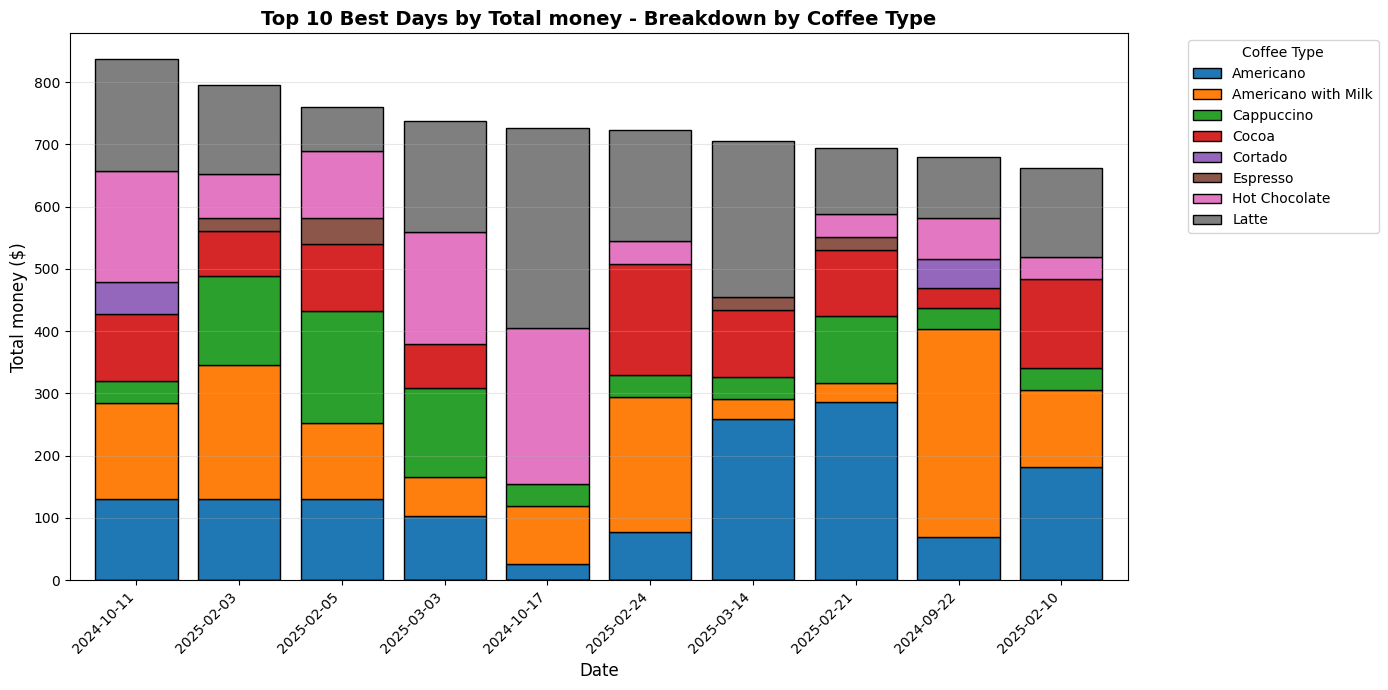


Top 10 Best Days - money Breakdown by Coffee Type:


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
date,,,,,,,,
2024-10-11,129.80,154.30,35.76,107.28,51.92,NaN,178.80,178.80
2025-02-03,129.80,216.02,143.04,71.52,NaN,21.06,71.52,143.04
2025-02-05,129.80,123.44,178.80,107.28,NaN,42.12,107.28,71.52
2025-03-03,103.84,61.72,143.04,71.52,NaN,NaN,178.80,178.80
2024-10-17,25.96,92.58,35.76,NaN,NaN,NaN,250.32,321.84
2025-02-24,77.88,216.02,35.76,178.80,NaN,NaN,35.76,178.80
2025-03-14,259.60,30.86,35.76,107.28,NaN,21.06,NaN,250.32
2025-02-21,285.56,30.86,107.28,107.28,NaN,21.06,35.76,107.28
2024-09-22,69.06,335.04,32.82,32.82,46.04,NaN,65.64,98.46


In [44]:
# Top 10 best days with breakdown by coffee type
# First get the top 10 dates
top_10_dates = df_cleaned.groupby('date')['money'].sum().sort_values(ascending=False).head(10).index

# Filter data for only those top 10 dates and group by date and coffee type
top_10_breakdown = df_cleaned[df_cleaned['date'].isin(top_10_dates)].groupby(['date', 'coffee_name'])['money'].sum().reset_index()

# Pivot for stacked bar chart
breakdown_pivot = top_10_breakdown.pivot(index='date', columns='coffee_name', values='money')

# Reorder by total (descending)
breakdown_pivot['total'] = breakdown_pivot.sum(axis=1)
breakdown_pivot = breakdown_pivot.sort_values('total', ascending=False).drop('total', axis=1)

# Create stacked bar chart
plt.figure(figsize=(14, 7))
breakdown_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), edgecolor='black', width=0.8)
plt.title('Top 10 Best Days by Total money - Breakdown by Coffee Type', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total money ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the data table
print("\nTop 10 Best Days - money Breakdown by Coffee Type:")
display(breakdown_pivot)

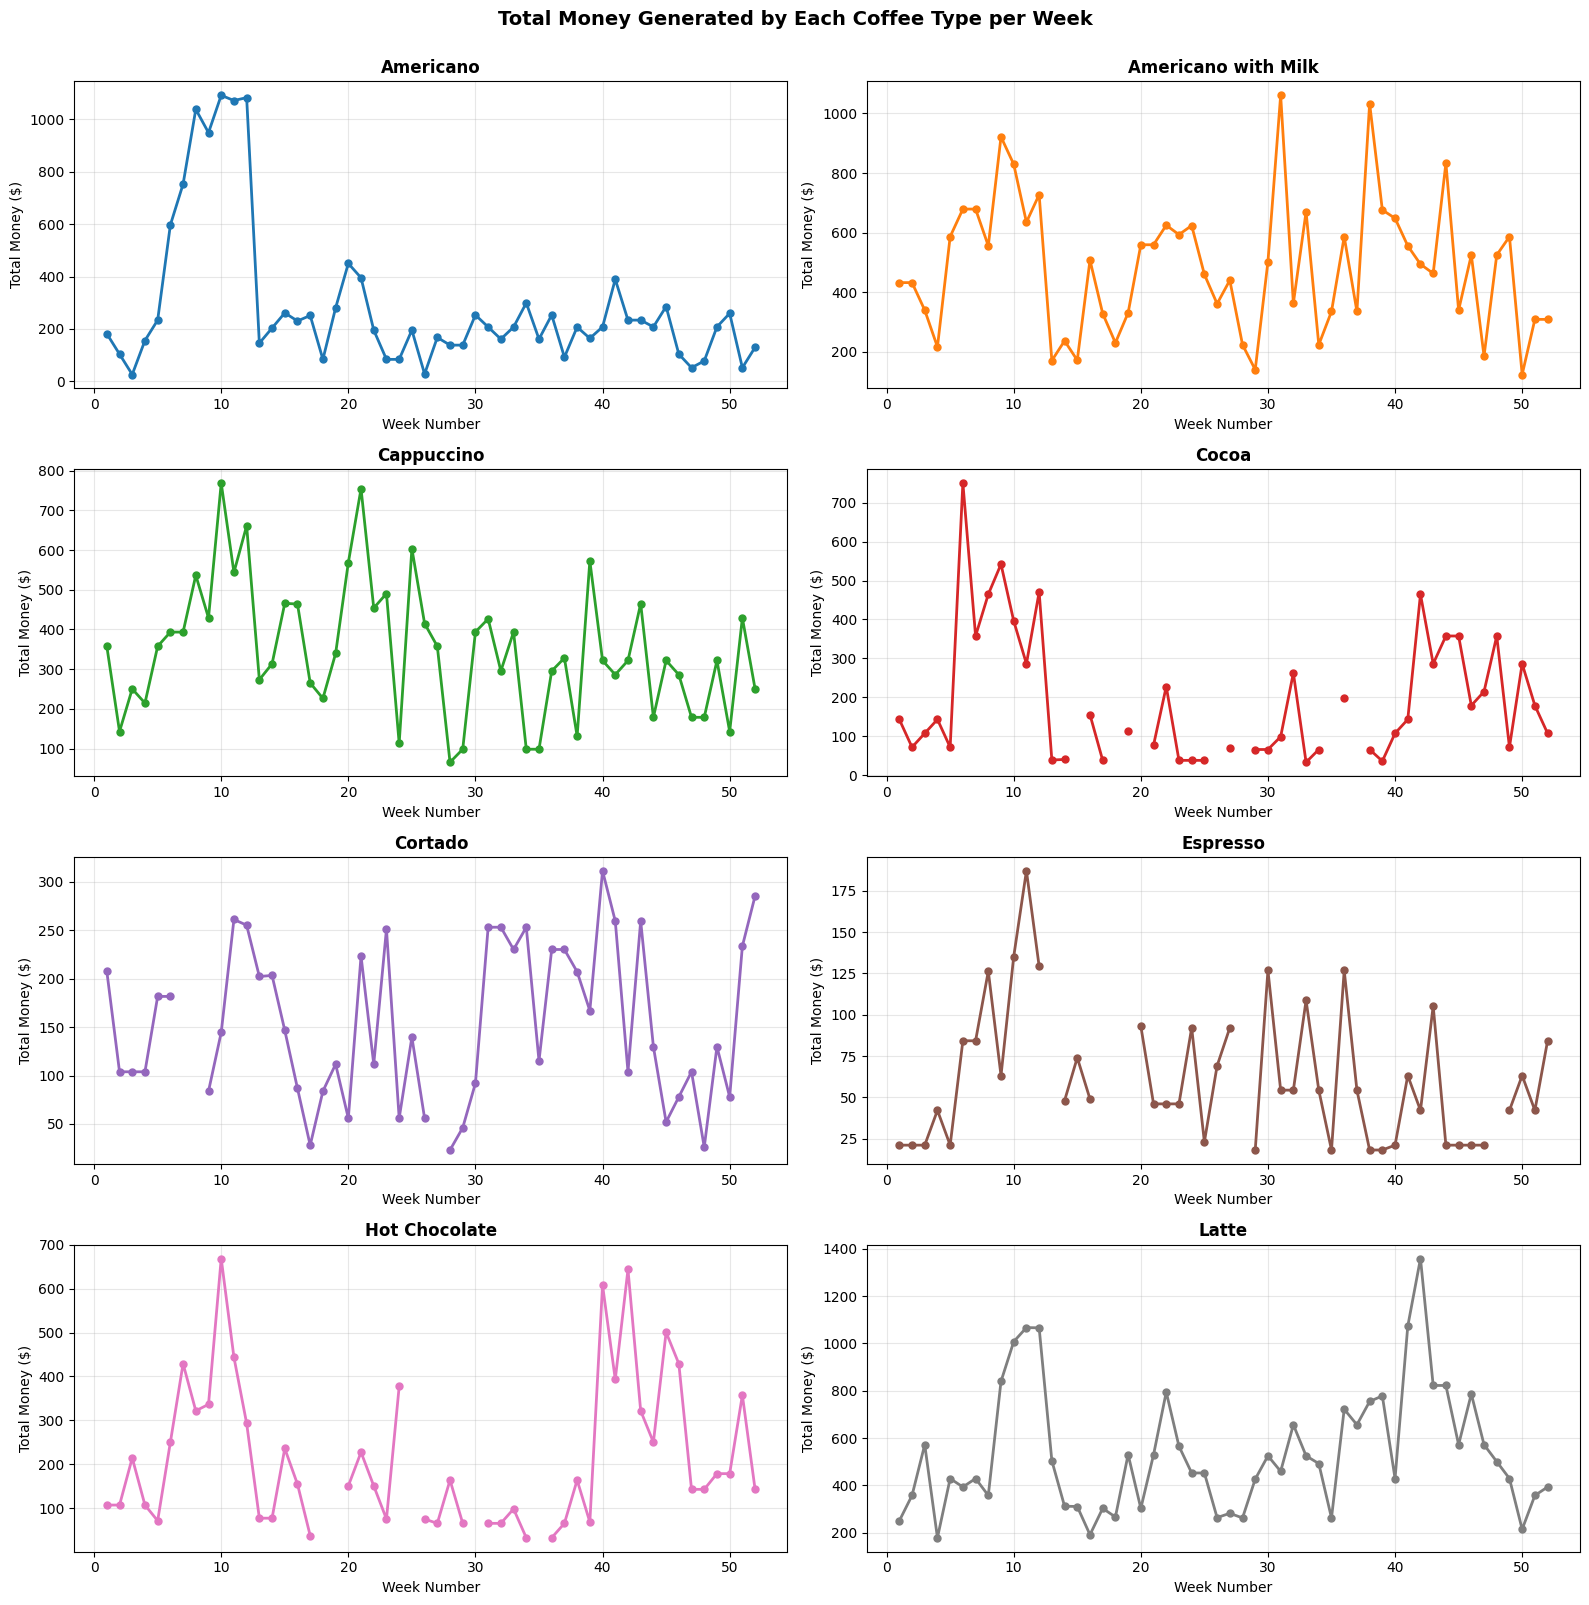

In [ ]:
# Total money generated by each coffee type per month - Using subplots for better readability
# First, create a month column
df_cleaned['month'] = df_cleaned['datetime'].dt.to_period('M')

money_by_type_month = df_cleaned.groupby(['month', 'coffee_name'])['money'].sum().reset_index()

# Convert period to string for plotting
money_by_type_month['month'] = money_by_type_month['month'].astype(str)

# Pivot for easier plotting
money_pivot = money_by_type_month.pivot(index='month', columns='coffee_name', values='money')

# Get the number of coffee types and create subplots
n_coffee_types = len(money_pivot.columns)
n_cols = 2  # Number of columns in subplot grid
n_rows = (n_coffee_types + 1) // 2  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each coffee type in its own subplot
for idx, coffee_type in enumerate(money_pivot.columns):
    axes[idx].plot(range(len(money_pivot.index)), money_pivot[coffee_type], marker='o', linewidth=2, markersize=6, color=f'C{idx}')
    axes[idx].set_title(f'{coffee_type}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Month', fontsize=10)
    axes[idx].set_ylabel('Total Money ($)', fontsize=10)
    axes[idx].set_xticks(range(len(money_pivot.index)))
    axes[idx].set_xticklabels(money_pivot.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3)

# Hide any unused subplots
for idx in range(n_coffee_types, len(axes)):
    axes[idx].axis('off')

fig.suptitle('Total Money Generated by Each Coffee Type per Month', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

- Cappucino, Latte, Americano, Americano with milk are the most consistent sellers
-  